In [1]:
from utils import *

# importing necessary libraries
import ee
import numpy as np
import pylab as plt

loading Roboflow workspace...
loading Roboflow project...
done


In [2]:
# initializing earth engine
ee.Authenticate()
ee.Initialize(project='fyp-wave-mapping')

In [58]:
# loading dataset
DATASET_NAME = 'COPERNICUS/S2'

# time iteration (a)
DATE_START = ee.Date('2024-02-01')
DATE_END = ee.Date('2024-03-01')

# time iteration (b)
# DATE_START = ee.Date('2022-01-01')
# DATE_END = ee.Date('2022-03-01')

CLOUDY_TOLERANCE = 60

dataset = ee.ImageCollection(DATASET_NAME).filterDate(DATE_START, DATE_END).filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', CLOUDY_TOLERANCE))


In [175]:
# choosing sample region
COORDINATE_LIST = [
    [151.7232483,-23.53207833],
    [145,-39],
    [142.645, -39.0947],
    [142.0747, -38.6325],
    [141.3556, -38.5933],
    [141.3556, -38.5220]
]
COORDINATE = COORDINATE_LIST[4]

OFFSET = 0.01 # defines the range of region from centre coordinate

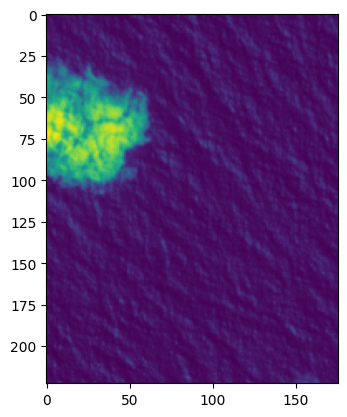

(223, 176)


In [176]:
# getting B4 image
img = get_img_coordinate(dataset, COORDINATE, OFFSET)

# displaying sample image
plt.imshow(img)
plt.show()

# printing shape of image
print(img.shape)

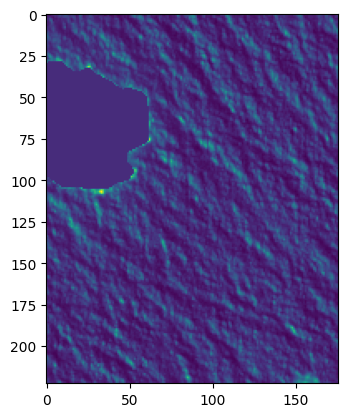

In [177]:
cloudless, mask = cloud_exclusion(img)

if cloudless is not None and mask is not None:
    plt.imshow(cloudless)
    plt.show()
else:
    cloudless = img
    mask = np.full(img.shape, np.nan)
    plt.imshow(img)
    plt.show()

In [178]:
# thresholding area of cloud cover
cloud_check = np.sum(~np.isnan(mask))/(img.shape[0]*img.shape[1]) < 0.4
print(cloud_check)

True


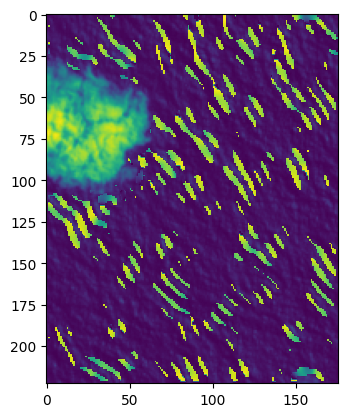

In [179]:
# finding average direction
if cloud_check:
    waves_out = compute_map(cloudless)
    waves_out = np.where(~np.isnan(mask), np.nan, waves_out)

    # displaying output wave map overlayed on original
    plt.imshow(img)
    plt.imshow(waves_out)
    plt.show()

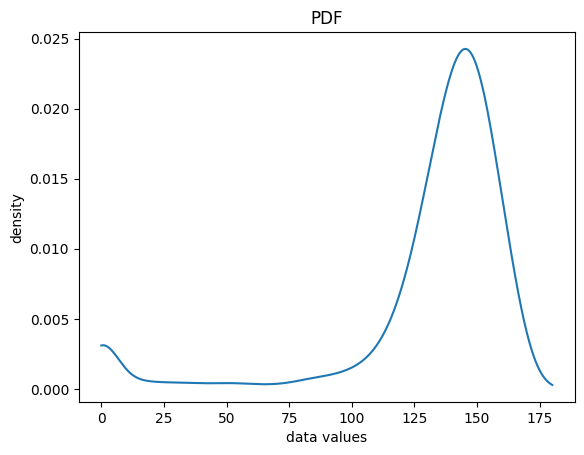

In [180]:
# pdf analysis
if cloud_check:
    kde, modes = pdf_analysis(waves_out, prominence=0.001, show=True)

In [181]:
if cloud_check:
    mode_vals = kde(modes)

    print(modes)
    print(modes[np.argmax(mode_vals)])

[145.22522523]
145.22522522522522


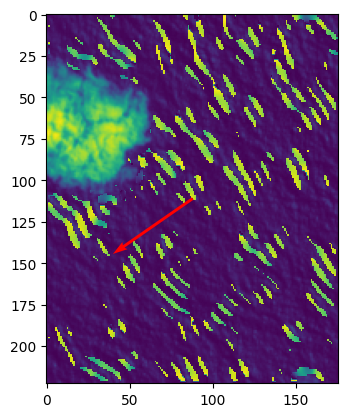

In [182]:
# showing img/waves_out/direction
if cloud_check:
    if modes.shape[0] > 0:
        show_direction(img, waves_out, modes[np.argmax(mode_vals)])
    else:
        print('no true direction found')

In [183]:
if cloud_check:
    print(f'direction found: {modes[np.argmax(mode_vals)]} deg')
else:
    print('no true direction found due to cloud cover')

direction found: 145.22522522522522 deg


End of Notebook.